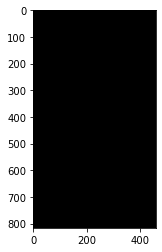

In [1]:
#compressing images from web

import PIL
import numpy as np
import cv2 
from PIL import Image, ImageChops
import urllib.request
import matplotlib.pyplot as plt
import os
from datetime import datetime

urllib.request.urlretrieve('https://lastmile.boonbox.com/media/delivery20210809_211642_4400097213.jpg', r'C:\Users\DELL\Desktop\New folder\picture.jpg')
img1 = PIL.Image.open(r'C:\Users\DELL\Desktop\New folder\picture.jpg')
width, height = img1.size

img = img1.resize((width,height),Image.ANTIALIAS)

path = r"C:\Users\DELL\Desktop\New folder\_compressed.jpg"

curr_datetime = datetime.now().strftime(' %Y-%m-%d %H-%M-%S')
splitted_path = os.path.splitext(path)
modified_picture_path = splitted_path[0] + curr_datetime + splitted_path[1]
img2 = PIL.Image.open(r'C:\Users\DELL\Desktop\New folder\picture.jpg')
img.save(modified_picture_path, optimize = True)
diff = ImageChops.difference(img1, img)
colors = diff.getpixel((320,240))
if(colors == (0,0,0)):
    plt.imshow(diff)

459 816
face is detected


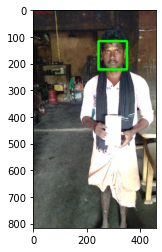

In [13]:
#Face detection

# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#pre-trained classifiers
haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

#function for face detection
def detect_faces(cascade, test_image, scaleFactor = 1.3):
    image_copy = test_image.copy()
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=3,minSize=(30, 30))
    faces = len(faces_rect)
    if faces == 1:
        print("face is detected")
    elif faces > 1:
        print("more than 1 face is detected")
    else:
        print("faces not detected")
        
    for (x, y, w, h) in faces_rect:
            cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 8)
            #roi_color = image_copy[y:y + h, x:x + w] 
            #print("[INFO] Object found. Saving locally.") 
            #cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)
    return image_copy

#loading image
urllib.request.urlretrieve('https://lastmile.boonbox.com/media/delivery20211123_135804_6200027566.jpg', r'picture2.jpg')
image_test = Image.open('picture2.jpg')
width,height = image_test.size
print(width,height)
if width > height:
    image2 = image_test.rotate(90)
    picture = image2.save('picture3.jpg')
    image = cv2.imread('picture3.jpg')
else:
    image = cv2.imread('picture2.jpg')

faces = detect_faces(haar_cascade_face, image)
plt.imshow(convertToRGB(faces))

2.8.0
The following GPU devices are available: 
Image downloaded to C:\Users\DELL\AppData\Local\Temp\tmpt_slvced.jpg.


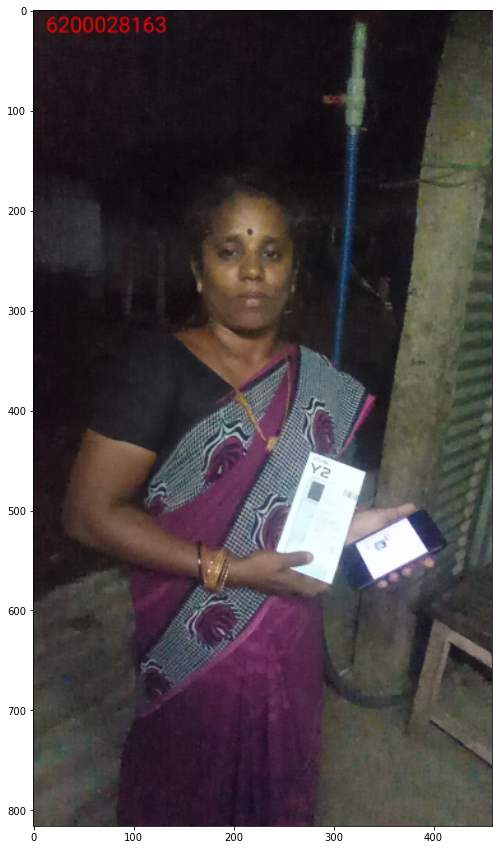

In [3]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub
import os
os.environ["TFHUB_CACHE_DIR"] = "some_dir"

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())


def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)


def download_and_resize_image(url, new_width, new_height,display=False):
    _, filename = tempfile.mkstemp(suffix=".jpg")
    response = urlopen(url)
    image_data = response.read()
    image_data = BytesIO(image_data)
    pil_image = Image.open(image_data)
    new_width, new_height = pil_image.size
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    pil_image_rgb.save(filename, format="JPEG", quality=90)
    print("Image downloaded to %s." % filename)
    if display:
        display_image(pil_image)
    return filename


def draw_bounding_box_on_image(image,ymin,xmin,ymax,xmax,color,font,thickness=4,display_str_list=()):
    """Adds a bounding box to an image."""
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],width=thickness,fill=color)
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height
        for display_str in display_str_list[::-1]:
            text_width, text_height = font.getsize(display_str)
            margin = np.ceil(0.05 * text_height)
            draw.rectangle([(left, text_bottom - text_height - 2 * margin),(left + text_width, text_bottom)],fill=color)
            draw.text((left + margin, text_bottom - text_height - margin),display_str,fill="black",font=font)
            text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    """Overlay labeled boxes on an image with formatted scores and label names."""
    colors = list(ImageColor.colormap.values())
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()
    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(image_pil,ymin,xmin,ymax,xmax,color,font,display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
    return image

# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
image_url = "https://lastmile.boonbox.com/media/delivery20211203_193100_6200028163.jpg" 
downloaded_image_path = download_and_resize_image(image_url, 989, 1280, True)

In [4]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Inference time:  96.20717096328735
Font not found, using default font.


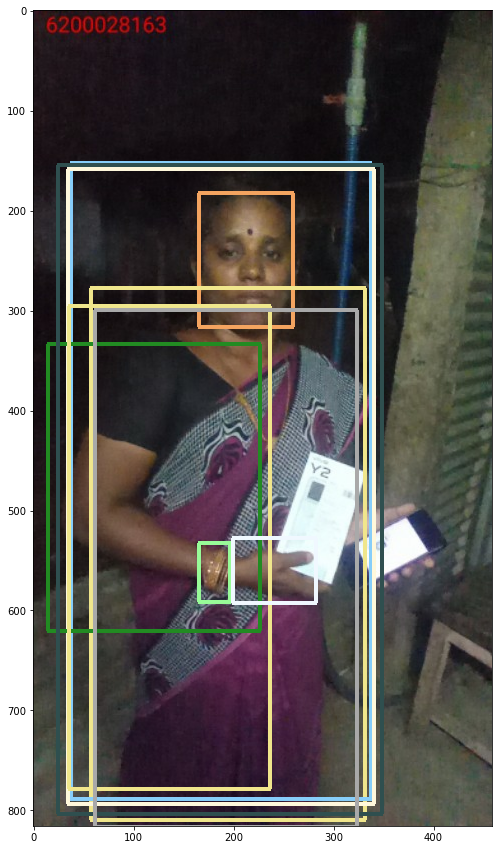

In [5]:
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

def run_detector(detector, path):
    img = load_img(path)
    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()
    
    result = {key:value.numpy() for key,value in result.items()}
    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)
    
    image_with_boxes = draw_boxes(img.numpy(), result["detection_boxes"],result["detection_class_entities"], result["detection_scores"])
    display_image(image_with_boxes)
    
run_detector(detector, downloaded_image_path)

In [9]:
#Blur Detection

from imutils import paths
import argparse
import cv2

threshold = 100.0

def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

ap = argparse.ArgumentParser()
ap.add_argument("--image", required=True,help="path to image")
args = vars(ap.parse_args())

image = cv2.imread(args["image.jpg"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
blur = False
text = "Not Blurry"
print("Not Blurry")

if fm < threshold:
    print("Blur")
    blur = True
    text = "Blurry"

cv2.putText(image, "{}: {:.2f}".format(text, fm), (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (140, 0, 255), 2)
cv2.imshow("Image", image)
key = cv2.waitKey()

usage: ipykernel_launcher.py [-h] --image IMAGE
ipykernel_launcher.py: error: the following arguments are required: --image


SystemExit: 2

C:\Users\DELL\Music\New folder\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
